# **statement**

**We have an  Ecommerce Customers data of a company and The company is trying to decide whether to focus their efforts on their mobile app experience or their website.**

In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *
import matplotlib.gridspec as gridspec

In [191]:
dataset = pd.read_csv("https://raw.githubusercontent.com/balu54/Linear_regreesion-on-Ecommerce_Customers/main/Linear-regression_model/Ecommerce%20Customers%20data.csv")

# **EDA**

**Take look into our dataset**

In [130]:
dataset.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [131]:
dataset.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


**checking for null values in the dataset**

In [132]:
dataset.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

*As there is no null values we can continue with outliers detection*

**Checking and removing outliers**



In [133]:
dataset.shape

(500, 8)

**outliers in visualization**

**A function for box plot**

In [134]:
def box_plot(df):
  dfint = df[df.columns[df.dtypes == "int64"] | df.columns[df.dtypes == "float64"]]
  fig, axes = plt.subplots((len(dfint.columns)//3) +1, 3,figsize=(20, dataset.shape[1]*2))
  r,c,count = 0,0,0
  for i in dfint.columns:
    # print(i,(len(dfint.columns)//3))
    sns.boxplot(y=dfint[i],color="black", ax=axes[r,c])
    if c == 2:
      c, r = -1, r+1
    if count == len(dfint.columns)-1:
      print(i,"end")
      fig.delaxes(axes.flatten()[count+1])
    c+=1
    count+=1

<ipython-input-134-9d736ca3e846>:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  dfint = df[df.columns[df.dtypes == "int64"] | df.columns[df.dtypes == "float64"]]


Yearly Amount Spent end


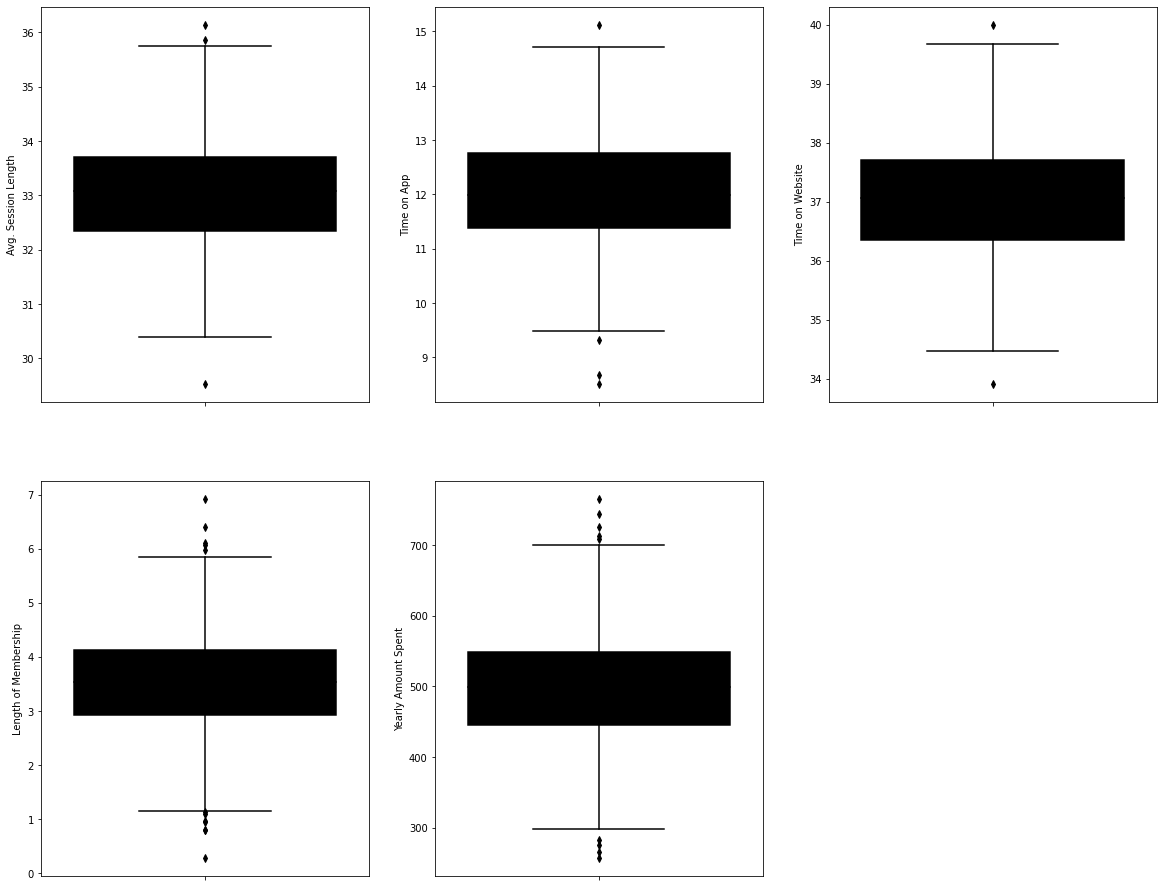

In [135]:
box_plot(dataset)

**There are too many outliers so we have to remove then**

**A function for outliers**

In [136]:
def outliers_detector(data,features):
    outliers = []
    for i in features:
      Q1 = data[i].quantile(0.25)
      Q2 = data[i].quantile(0.5)
      Q3 = data[i].quantile(0.75)
      iqr = Q3 - Q1
      mini = Q1 - 1.5 * iqr
      maxi = Q3 + 1.5 * iqr
      print(f"{i} -> mini -> {mini}, maxi -> {maxi}, Q1 -> {Q1}, medain -> {Q2}, Q3 -> {Q3}, irq -> {iqr} \n")
      outliers.extend(list(data[i].index[(data[i] > maxi) | (data[i] < mini)]))
    return outliers

ind = outliers_detector(dataset.iloc[:,3:],list(dataset.iloc[:,3:].columns))
print("Total_outliers_indexes in DataFrame",len(set(ind)),ind)


Avg. Session Length -> mini -> 30.28657747536273, maxi -> 35.767229553109516, Q1 -> 32.34182200451777, medain -> 33.08200760262899, Q3 -> 33.71198502395447, irq -> 1.3701630194366956 

Time on App -> mini -> 9.3396088251313, maxi -> 14.802394229583683, Q1 -> 11.388153351800943, medain -> 11.983231258825267, Q3 -> 12.753849702914039, irq -> 1.3656963511130957 

Time on Website -> mini -> 34.29849491039147, maxi -> 39.76719469493466, Q1 -> 36.34925732959517, medain -> 37.069366582835826, Q3 -> 37.716432275730966, irq -> 1.3671749461357976 

Length of Membership -> mini -> 1.136371357955959, maxi -> 5.920580296370714, Q1 -> 2.930449709861492, medain -> 3.5339750035877096, Q3 -> 4.126501944465181, irq -> 1.1960522346036888 

Yearly Amount Spent -> mini -> 288.62495124023667, maxi -> 705.7271533863172, Q1 -> 445.03827704501686, medain -> 498.887875469115, Q3 -> 549.313827581537, irq -> 104.27555053652014 

Total_outliers_indexes in DataFrame 24 [12, 154, 390, 65, 309, 362, 442, 69, 157, 50,

**function to remove outliers**

In [137]:

def outliers_remover(data,outliers):
  data.drop(set(outliers),inplace=True)
  return data
df = outliers_remover(dataset,ind)
print(len(df))

476


After removeing outliers

Yearly Amount Spent end


<ipython-input-134-9d736ca3e846>:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  dfint = df[df.columns[df.dtypes == "int64"] | df.columns[df.dtypes == "float64"]]


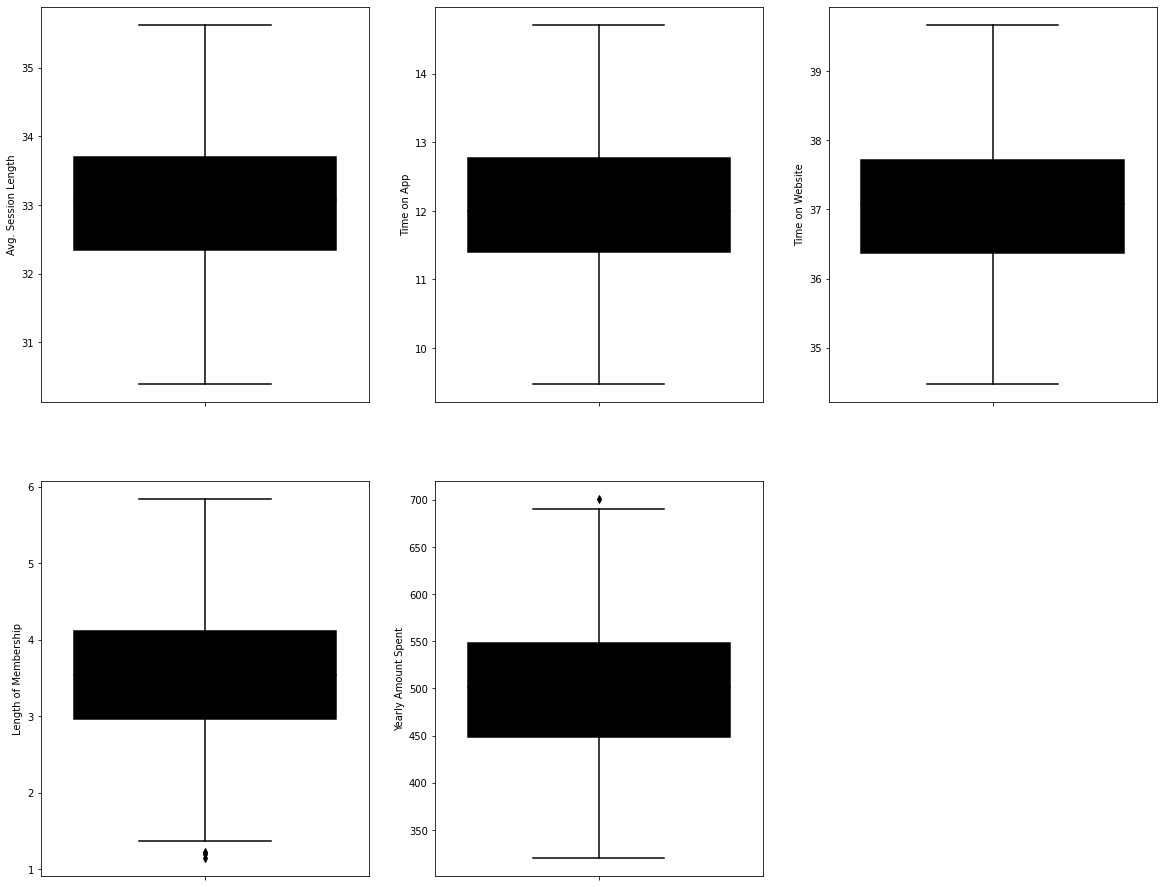

In [138]:
box_plot(df)

In [139]:
ind = outliers_detector(df.iloc[:,3:],list(df.columns)[3:])
print(ind,len(df))
dataset = outliers_remover(dataset,ind)
print(len(dataset))

Avg. Session Length -> mini -> 30.303772420236818, maxi -> 35.7385713116527, Q1 -> 32.34182200451777, medain -> 33.07713320079979, Q3 -> 33.70052172737174, irq -> 1.3586997228539701 

Time on App -> mini -> 9.343339141945862, maxi -> 14.820702766577782, Q1 -> 11.397350501182832, medain -> 11.995166947195546, Q3 -> 12.766691407340812, irq -> 1.36934090615798 

Time on Website -> mini -> 34.33833717325757, maxi -> 39.743289337215, Q1 -> 36.36519423474161, medain -> 37.07558311153922, Q3 -> 37.716432275730966, irq -> 1.351238040989358 

Length of Membership -> mini -> 1.2375065695931933, maxi -> 5.84693873748812, Q1 -> 2.9660436325537907, medain -> 3.5354454477463864, Q3 -> 4.118401674527522, irq -> 1.1523580419737316 

Yearly Amount Spent -> mini -> 298.27213143575204, maxi -> 698.3805170868752, Q1 -> 448.31277605492323, medain -> 501.1113683678547, Q3 -> 548.339872467704, irq -> 100.02709641278079 

[214, 320, 487, 24] 476
472


Yearly Amount Spent end


<ipython-input-134-9d736ca3e846>:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  dfint = df[df.columns[df.dtypes == "int64"] | df.columns[df.dtypes == "float64"]]


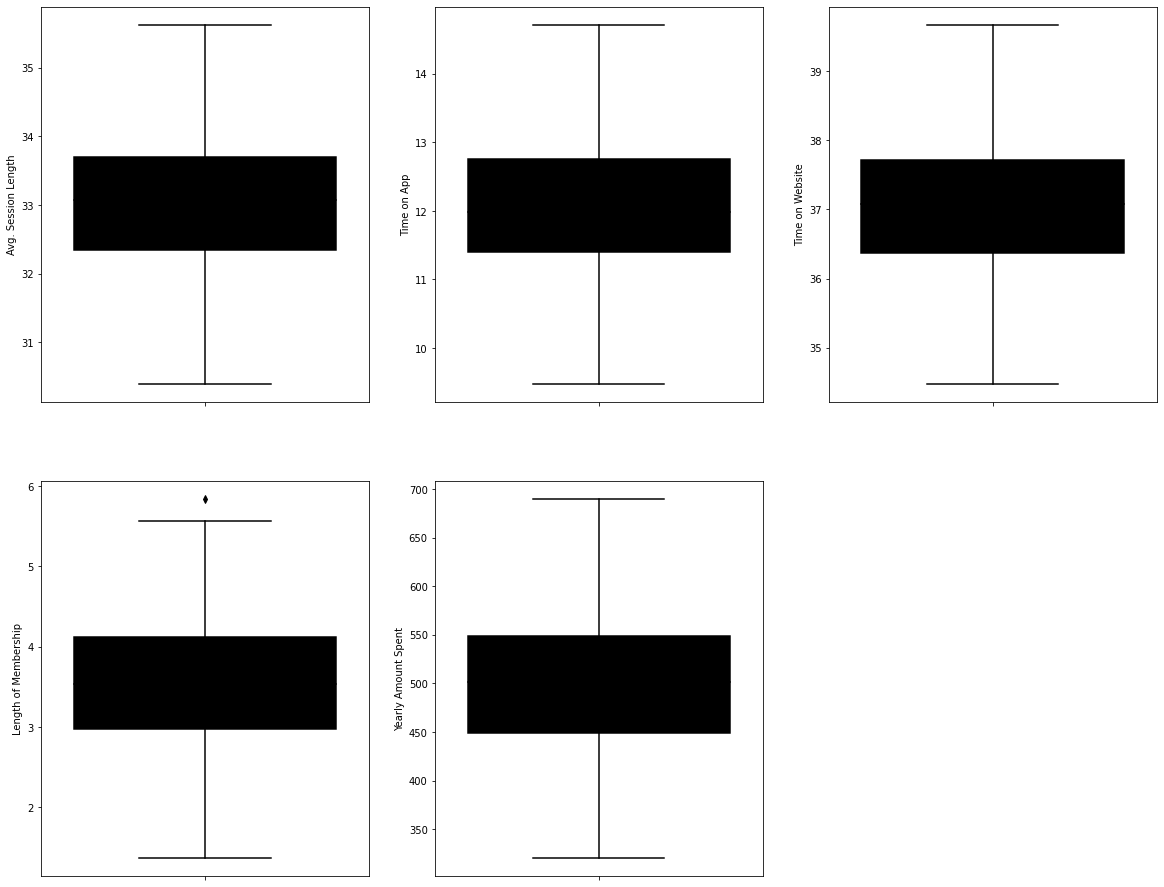

In [140]:
box_plot(dataset)
# dataset

**Now we are free from those outliers**

**checking correlation of datset**

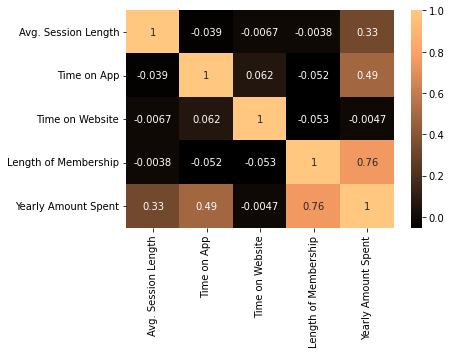

In [141]:
sns.heatmap(dataset.corr(),annot=True,cmap="copper")

**function for dist plot**

In [142]:
def dist_plot(df):
  dfint = df[df.columns[df.dtypes == "int64"] | df.columns[df.dtypes == "float64"]]
  fig, axes = plt.subplots((len(dfint.columns)//3) +1, 3,figsize=(20, 15))
  r,c, count = 0,0,0
  for i in dfint.columns:
    # print(i,(len(dfint.columns)//3))
    sns.distplot(dfint[i],color="black", ax=axes[r,c])
    if c == 2:
      c, r = -1, r+1
    if count == len(dfint.columns)-1:
      print(i,"end")
      fig.delaxes(axes.flatten()[count+1])
    c+=1
    count+=1

<ipython-input-142-fe4c200b8e4d>:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  dfint = df[df.columns[df.dtypes == "int64"] | df.columns[df.dtypes == "float64"]]
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/us

Yearly Amount Spent end


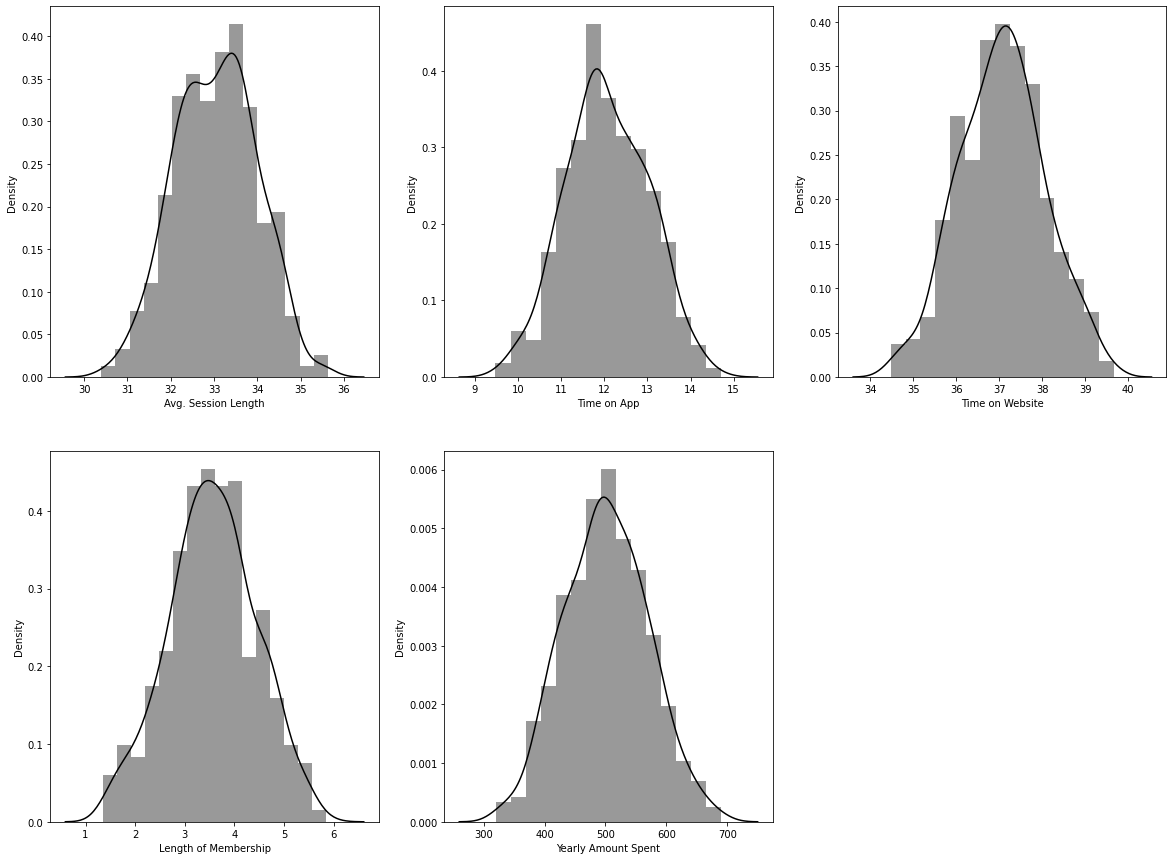

In [143]:
dist_plot(dataset)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

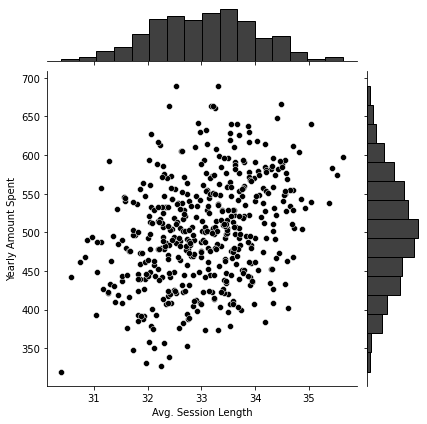

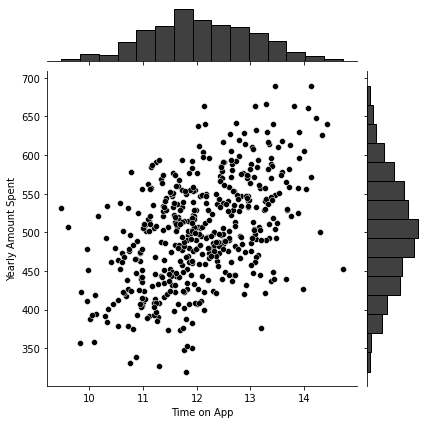

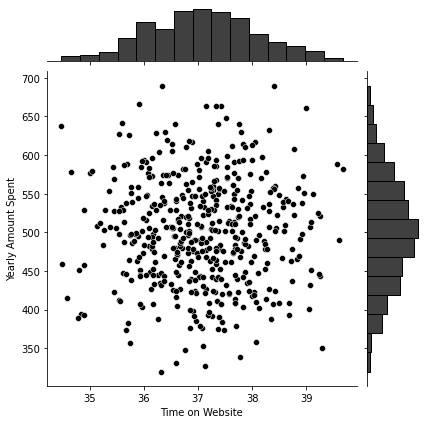

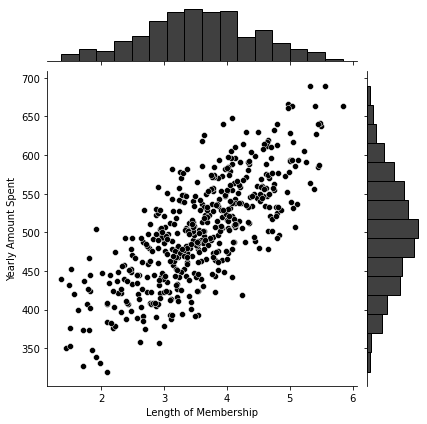

In [144]:
for i in df.columns[3:-1]:
  sns.jointplot(df[i],df.iloc[:,-1],color="black")

**make a pair plot to get more details regrading the dataset**

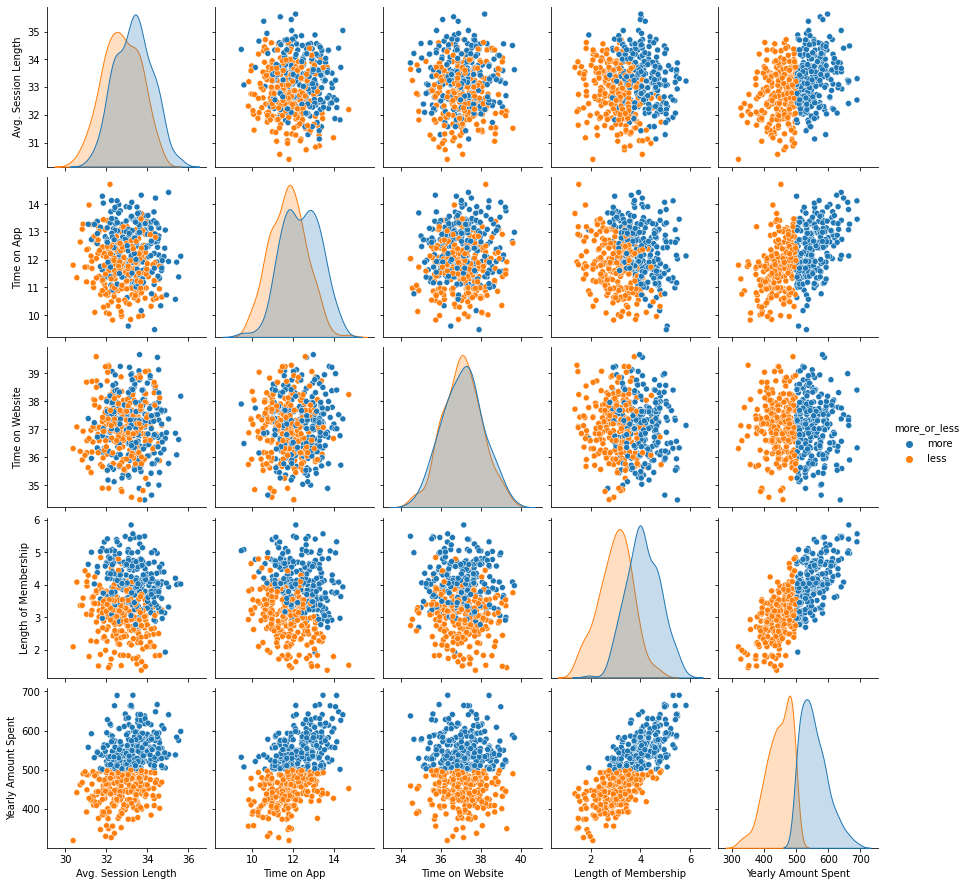

In [146]:
sns.pairplot(dataset,hue="more_or_less")

# **Building model**

**import required modules**

In [148]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

**Declaring Independent and Dependent variable**

## **using actual data**

###**Declaring Train and Testing Data**

In [149]:
x= dataset.iloc[:,3:-1]
y=dataset.iloc[:,-1]

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

### **Declaring and fiting Linear Regression model**

In [152]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

**predting values using predict function**

In [153]:
pred = lr.predict(x_test)

**ploting regplot**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


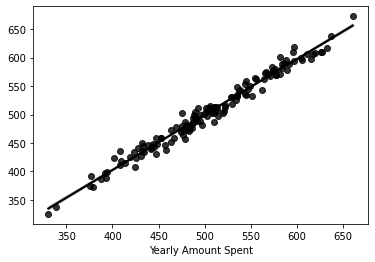

In [154]:
sns.regplot(y_test,pred,color="black")

**Distplot for Residuals**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


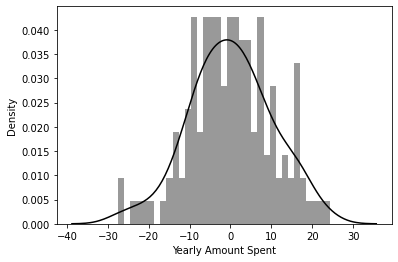

In [155]:
sns.distplot((y_test-pred),color="black",bins=35)

In [156]:
print(min(pred),max(pred),len(pred))
print(min(y_test),max(pred))

325.36202215238495 672.7879100800492 142
330.5944460341002 672.7879100800492


**Using statsmodelapi to take a brief summary**

In [157]:
lr.coef_

array([25.82273608, 39.02749674,  0.60908578, 61.26385166])

**Accurancies and metrics of our model**

In [158]:
print(" Traing Accuracy",lr.score(x_train,y_train),"\n","Testing Accuracy",lr.score(x_test,y_test))

 Traing Accuracy 0.9789412667480526 
 Testing Accuracy 0.9776058736717433


**we conclude that our model wasn't overfitted / underfitted**

In [159]:
def mean_square_error_mine(y_test,y_pred):
  total = 0
  for i,j in zip(y_test,pred):
    total += (j-i)**2
  return total/len(pred),(total/len(pred))**0.5

mse_rmse = mean_square_error_mine(y_test,pred)
print(f" mean square error {mse_rmse[0]}","\n",f"root mean square error {mse_rmse[1]}")#,mean_square_error_mine(y_test,pred))
print(f" mean absolute error {mean_absolute_error(y_test,pred)}")

 mean square error 101.56600317749314 
 root mean square error 10.077995990150677
 mean absolute error 7.996276679646487


**Co-efficents or slopes of our model**

In [160]:
model = sm.OLS(y,x).fit()
print(model.summary())
print(" Traing Accuracy",lr.score(x_train,y_train),"\n","Testing Accuracy",lr.score(x_test,y_test))

                                 OLS Regression Results                                 
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          6.043e+04
Date:                 Sat, 14 Jan 2023   Prob (F-statistic):                        0.00
Time:                         07:44:58   Log-Likelihood:                         -2133.6
No. Observations:                  472   AIC:                                      4275.
Df Residuals:                      468   BIC:                                      4292.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [ ]:
coef = pd.DataFrame(lr.coef_,index=dataset.columns[3:-1])

### **Ridge and lasso**

In [162]:
lasso = Lasso()
ridge = Ridge()
lasso.fit(x_train,y_train)
ridge.fit(x_train,y_train)
lasso_pred = lasso.predict(x_test)
ridge_pred = lasso.predict(x_test)
print(" lasso model training scores",lasso.score(x_train,y_train),"\n","lasso model testing scores",lasso.score(x_test,y_test),"\n")
print(" ridge model scores",ridge.score(x_train,y_train),"\n","ridge model testing scores",ridge.score(x_test,y_test),"\n")
print(" linear regresion model scores",lr.score(x_train,y_train),"\n","linear regression model testing scores",lr.score(x_test,y_test),"\n")

 lasso model training scores 0.9780754695253566 
 lasso model testing scores 0.9769514927196203 

 ridge model scores 0.9789266724149011 
 ridge model testing scores 0.9775660787296886 

 linear regresion model scores 0.9789412667480526 
 linear regression model testing scores 0.9776058736717433 



## **Using Standarad data**

### **Scalling and Declaring Train and Testing Data**

In [ ]:
std_x = pd.DataFrame(StandardScaler().fit_transform(dataset.iloc[:,3:-1]),columns=dataset.columns[3:-1])

In [175]:
x_train, x_test, y_train, y_test = train_test_split(std_x,y,test_size=0.3,random_state=42)

### **Declaring and fiting Linear Regression model**

In [176]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

**predting values using predict function**

In [177]:
pred = lr.predict(x_test)

**ploting regplot**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


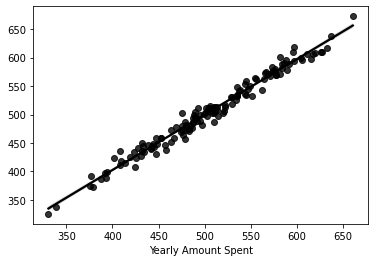

In [178]:
sns.regplot(y_test,pred,color="black")

**Distplot for Residuals**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


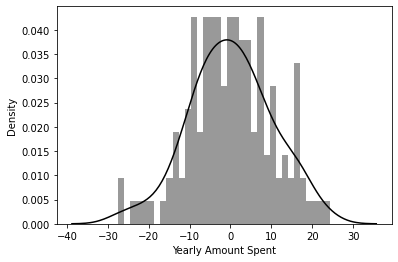

In [179]:
sns.distplot((y_test-pred),color="black",bins=35)

In [180]:
print(min(pred),max(pred),len(pred))
print(min(y_test),max(pred))

325.3620221523852 672.7879100800491 142
330.5944460341002 672.7879100800491


**Using statsmodelapi to take a brief summary**

In [181]:
lr.coef_

array([24.37959216, 37.32641342,  0.60617329, 53.71115871])

**Accurancies and metrics of our model**

In [182]:
print(" Traing Accuracy",lr.score(x_train,y_train),"\n","Testing Accuracy",lr.score(x_test,y_test))

 Traing Accuracy 0.9789412667480525 
 Testing Accuracy 0.9776058736717433


**we conclude that our model wasn't overfitted / underfitted**

In [183]:
def mean_square_error_mine(y_test,y_pred):
  total = 0
  for i,j in zip(y_test,pred):
    total += (j-i)**2
  return total/len(pred),(total/len(pred))**0.5

mse_rmse = mean_square_error_mine(y_test,pred)
print(f" mean square error {mse_rmse[0]}","\n",f"root mean square error {mse_rmse[1]}")#,mean_square_error_mine(y_test,pred))
print(f" mean absolute error {mean_absolute_error(y_test,pred)}")

 mean square error 101.56600317749314 
 root mean square error 10.077995990150677
 mean absolute error 7.996276679646488


**Co-efficents or slopes of our model**

In [184]:
model = sm.OLS(y,x).fit()
print(model.summary())
print(" Traing Accuracy",lr.score(x_train,y_train),"\n","Testing Accuracy",lr.score(x_test,y_test))

                                 OLS Regression Results                                 
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          6.043e+04
Date:                 Sat, 14 Jan 2023   Prob (F-statistic):                        0.00
Time:                         07:45:01   Log-Likelihood:                         -2133.6
No. Observations:                  472   AIC:                                      4275.
Df Residuals:                      468   BIC:                                      4292.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [ ]:
coef_std = pd.DataFrame(lr.coef_,index=dataset.columns[3:-1])

### **Ridge and lasso**

In [186]:
lasso = Lasso()
ridge = Ridge()
lasso.fit(x_train,y_train)
ridge.fit(x_train,y_train)
lasso_pred = lasso.predict(x_test)
ridge_pred = lasso.predict(x_test)
print(" lasso model training scores",lasso.score(x_train,y_train),"\n","lasso model testing scores",lasso.score(x_test,y_test),"\n")
print(" ridge model scores",ridge.score(x_train,y_train),"\n","ridge model testing scores",ridge.score(x_test,y_test),"\n")
print(" linear regresion model scores",lr.score(x_train,y_train),"\n","linear regression model testing scores",lr.score(x_test,y_test),"\n")

 lasso model training scores 0.9781897747718841 
 lasso model testing scores 0.977090152077348 

 ridge model scores 0.978931414645959 
 ridge model testing scores 0.9775817434560945 

 linear regresion model scores 0.9789412667480525 
 linear regression model testing scores 0.9776058736717433 



# **conclusion of project**

In [187]:
coef

,0
Avg. Session Length,25.822736
Time on App,39.027497
Time on Website,0.609086
Length of Membership,61.263852


In [ ]:
#  mean square error 101.56600317749314 
#  root mean square error 10.077995990150677
#  mean absolute error 7.996276679646487

# After standardization
#   mean square error 101.56600317749314 
#  root mean square error 10.077995990150677
#  mean absolute error 7.996276679646488

In [189]:
coef_std

,0
Avg. Session Length,24.379592
Time on App,37.326413
Time on Website,0.606173
Length of Membership,53.711159


## **Regarding model predection**

**As our R square and abjusted R square scores is good, we can conclude that our model was good at predecting**

## **where should the company focus on app/website**

We can interpret this data to make certain observations, for example:- If all other factors are kept constant then increasing the **Avg. Session Length** by one unit will increase the yearly amount spent by a customer by an estimate of **24**

Similarly increasing **Time on App** by one unit increases yearly amount spent by **37** whereas, increasing **Time on Website** by one unit increases yearly amount spent by only **3** approximately.

According to the data above the largest increase of approximately **53** is observed when the **Length of Membership** is increased by one unit.

**Using the predictions above we can develop ways in order to increase yearly amount spent by the customers. We can improve the app experience so that the users spend more of their time on the app or we can also focus on the website and develop it so that it becomes as efficient as the app or we can focus on customer relationship so that people remain members for long periods of time**.

**The company should focus on the mobile app**